In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [21]:
from scrapp_refacto import *
movies

,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
0,Les Évadés,1994,9.3,['Frank Darabont'],2385819,28341469,[Drama],142
1,Le parrain,1972,9.2,['Francis Ford Coppola'],1653469,134966411,"[Crime, Drama]",175
2,The Dark Knight : Le Chevalier noir,2008,9.0,['Christopher Nolan'],2349001,534858444,"[Action, Crime, Drama]",152
3,"Le parrain, 2ème partie",1974,9.0,['Francis Ford Coppola'],1150257,57300000,"[Crime, Drama]",202
4,12 Hommes en colère,1957,9.0,['Sidney Lumet'],704247,4360000,"[Crime, Drama]",96
...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,['Frank Capra'],108496,9600000,"[Comedy, Drama]",129
246,Autant en emporte le vent,1939,8.1,"['Victor Fleming', 'George Cukor', 'Sam Wood']",294089,198676459,"[Drama, History, Romance]",238
247,New York - Miami,1934,8.1,['Frank Capra'],95784,4360000,"[Comedy, Romance]",105
248,La passion de Jeanne d'Arc,1928,8.1,['Carl Theodor Dreyer'],49013,21877,"[Biography, Drama, History]",110


In [22]:
movies.Titre = movies.Titre.astype(str).astype(str)
movies.Année = movies.Année.astype(str).astype(int)
movies.Score = movies.Score.astype(str).astype(float)
movies.Réalisateur = movies.Réalisateur.astype(str).astype(str)
movies.Votes = movies.Votes.astype(str).astype(int)
movies.Recette = movies.Recette.astype(str)
movies.Recette = movies.Recette.apply(lambda x: x.replace(",", ""))
movies.Recette = movies.Recette.astype(str).astype(int)
movies.isnull().sum(axis=0)


Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
Genre          0
Durée          0
dtype: int64

In [23]:
movies = movies.convert_dtypes()
movies['Durée'] = movies['Durée'].astype(int)
movies.dtypes

Titre           string
Année            Int64
Score          Float64
Réalisateur     string
Votes            Int64
Recette          Int64
Genre           object
Durée            int64
dtype: object

In [24]:
df_sort_by_recette = movies.sort_values('Recette', ascending=False)
df_sort_by_recette


,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
57,Avengers: Endgame,2019,8.4,"['Anthony Russo', 'Joe Russo']",866607,858373000,"[Action, Adventure, Drama]",181
58,Avengers: Infinity War,2018,8.4,"['Anthony Russo', 'Joe Russo']",872276,678815482,"[Action, Adventure, Sci-Fi]",149
2,The Dark Knight : Le Chevalier noir,2008,9.0,['Christopher Nolan'],2349001,534858444,"[Action, Crime, Drama]",152
61,The Dark Knight Rises,2012,8.4,['Christopher Nolan'],1541397,448139099,"[Action, Adventure]",164
42,The Lion King,1994,8.5,"['Roger Allers', 'Rob Minkoff']",959109,422783777,"[Animation, Adventure, Drama]",88
...,...,...,...,...,...,...,...,...
176,L'accusé,2016,8.1,['Oriol Paulo'],151110,0,"[Crime, Drama, Mystery]",106
86,The Father,2020,8.3,['Florian Zeller'],51181,0,[Drama],97
82,Drishyam,2013,8.3,['Jeethu Joseph'],34912,0,"[Crime, Drama, Thriller]",160
79,Boulevard du Crépuscule,1950,8.4,['Billy Wilder'],204958,0,"[Drama, Film-Noir]",110


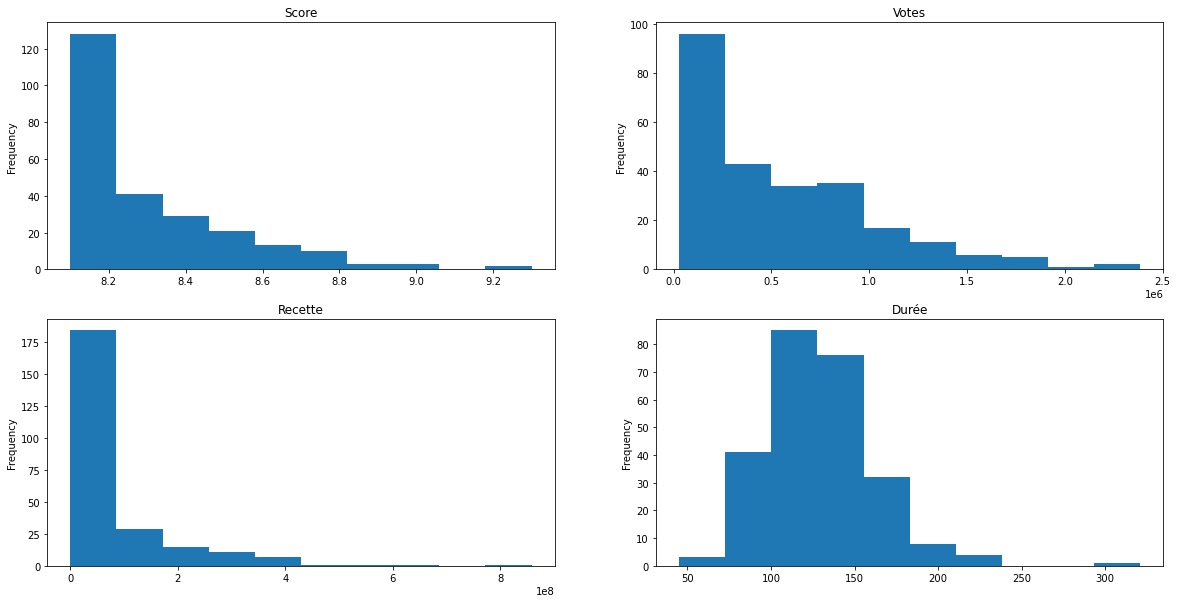

In [25]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

movies['Score'].plot(kind='hist', bins=10, ax=ax[0,0], title='Score')
movies['Votes'].plot(kind='hist', bins=10, ax=ax[0,1], title='Votes')
movies['Recette'].plot(kind='hist', bins=10, ax=ax[1,0], title='Recette')
movies['Durée'].plot(kind='hist', bins=10, ax=ax[1,1], title='Durée');

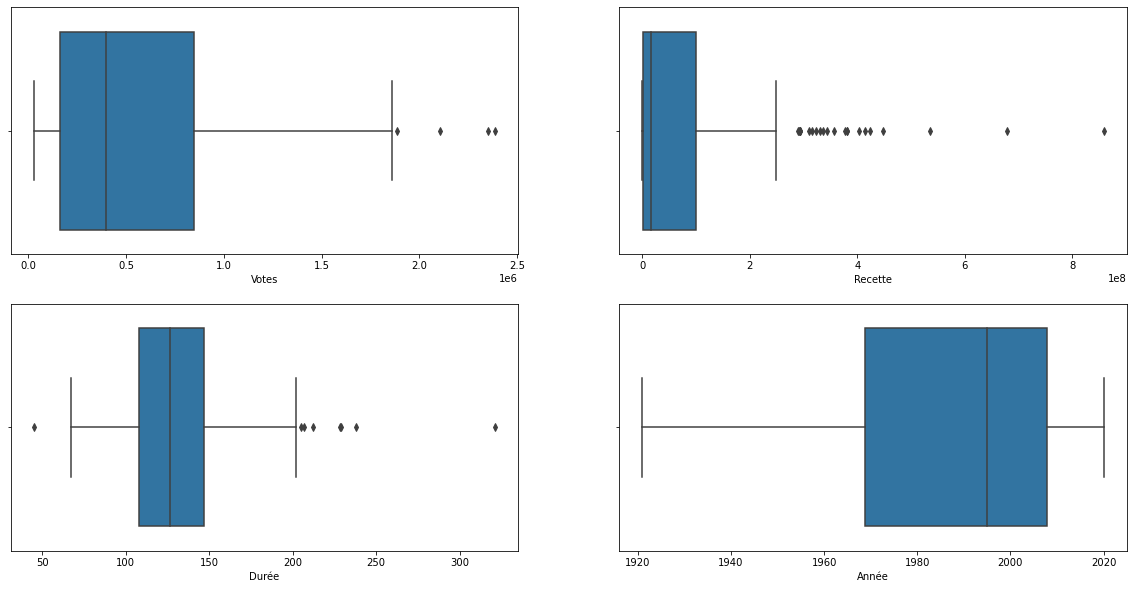

In [26]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.boxplot(x=movies['Votes'], ax=ax[0,0])
sns.boxplot(x=movies['Recette'], ax=ax[0,1])
sns.boxplot(x=movies['Durée'], ax=ax[1,0])
sns.boxplot(x=movies['Année'], ax=ax[1,1]);

/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

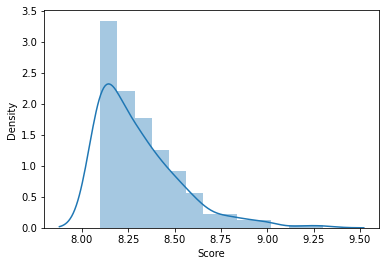

In [27]:
sns.distplot(movies['Score'])

/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

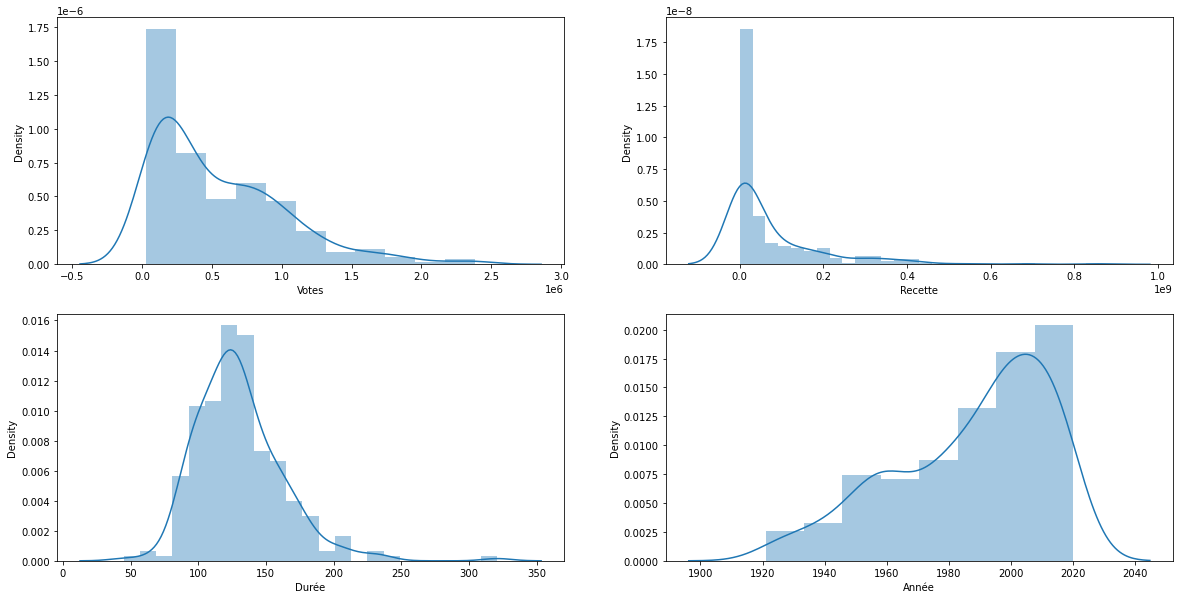

In [28]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.distplot(movies['Votes'], ax=ax[0,0])
sns.distplot(movies['Recette'], ax=ax[0,1])
sns.distplot(movies['Durée'], ax=ax[1,0])
sns.distplot(movies['Année'], ax=ax[1,1]);

In [29]:
movies.describe()

,Année,Score,Votes,Recette,Durée
count,250.000000,250.000000,2.500000e+02,2.500000e+02,250.000000
mean,1987.440000,8.303200,5.486780e+05,7.503178e+07,130.104000
std,24.927654,0.222233,4.751017e+05,1.226044e+08,32.494256
min,1921.000000,8.100000,2.803400e+04,0.000000e+00,45.000000
25%,1968.750000,8.100000,1.609842e+05,1.026894e+06,108.000000
50%,1995.000000,8.200000,3.991575e+05,1.635978e+07,126.500000
75%,2007.750000,8.400000,8.470292e+05,1.004006e+08,146.750000
max,2020.000000,9.300000,2.385819e+06,8.583730e+08,321.000000


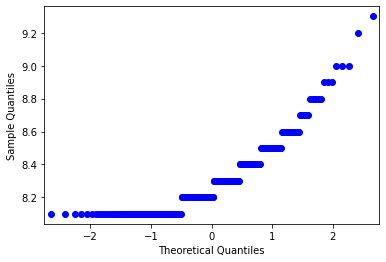

In [30]:
import statsmodels.api as sm

sm.qqplot(movies['Score'])
plt.show()

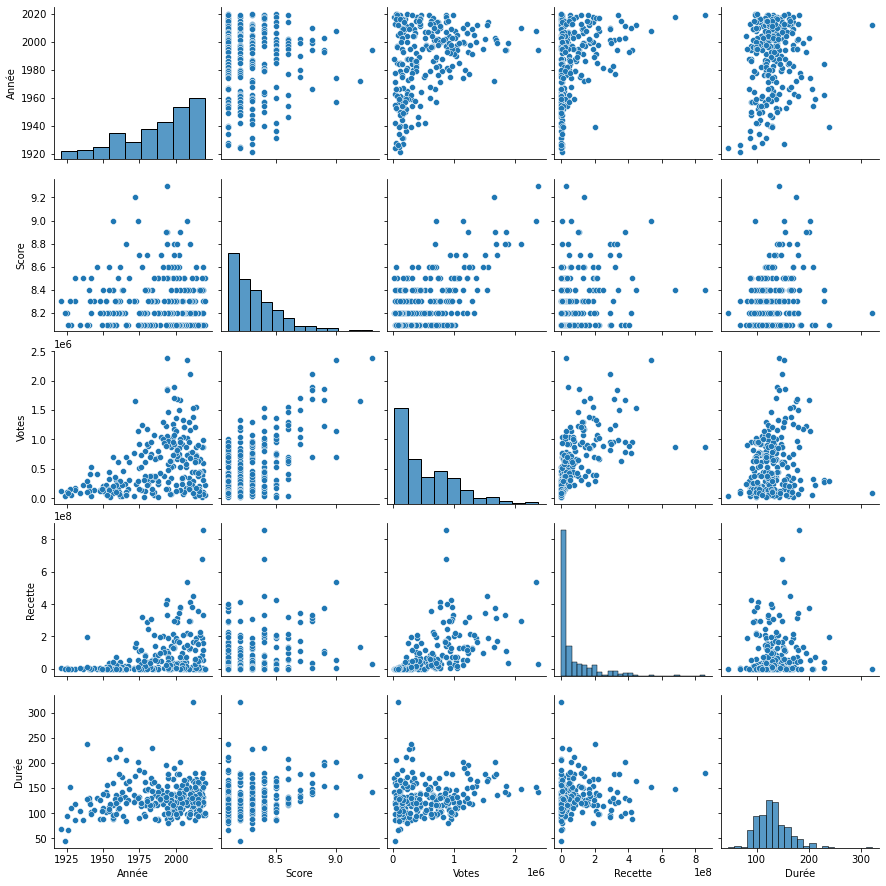

In [31]:
sns.pairplot(movies)

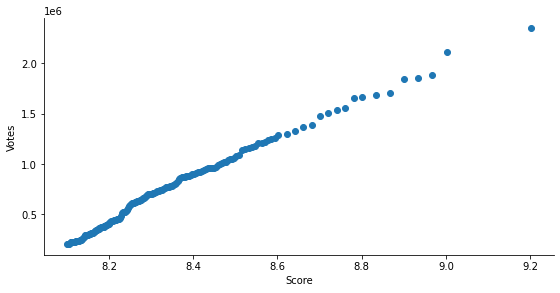

In [32]:
from seaborn_qqplot import pplot
pplot(movies, x="Score", y="Votes", kind='qq',height=4, aspect=2)

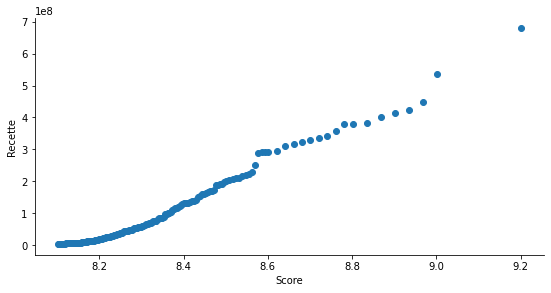

In [33]:
pplot(movies, x="Score", y="Recette", kind='qq',height=4, aspect=2)

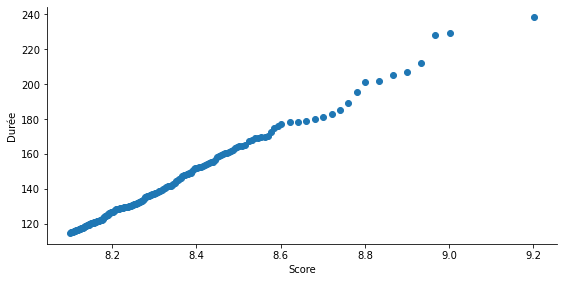

In [34]:
pplot(movies, x="Score", y="Durée", kind='qq',height=4, aspect=2)

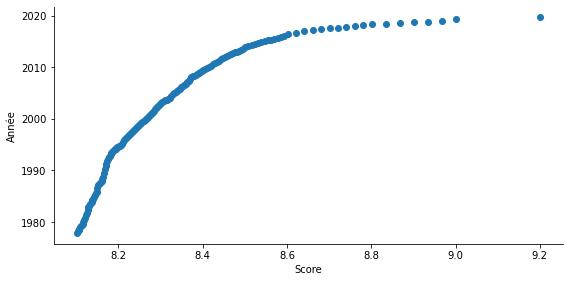

In [35]:
pplot(movies, x="Score", y="Année", kind='qq',height=4, aspect=2)